In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler as ss, LabelEncoder as le
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [36]:
df=pd.read_csv('Laptop_price_first.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   TypeName          1275 non-null   object 
 2   Inches            1275 non-null   float64
 3   ScreenResolution  1275 non-null   object 
 4   Cpu               1275 non-null   object 
 5   Ram               1275 non-null   int64  
 6   Memory            1275 non-null   object 
 7   Gpu               1275 non-null   object 
 8   OpSys             1275 non-null   object 
 9   Weight            1275 non-null   float64
 10  Price_euros       1275 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 109.7+ KB


In [10]:
for i in list(df):
    print(f"{i}={df[i].unique()}\n")

Company=['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

TypeName=['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']

Inches=[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]

ScreenResolution=['2560x1600' '1440x900' '1920x1080' '2880x1800' '1366x768' '2304x1440'
 '3200x1800' '1920x1200' '2256x1504' '3840x2160' '2160x1440' '2560x1440'
 '1600x900' '2736x1824' '2400x1600']

Cpu=['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Atom x5-Z8350 1.44GHz' 'Intel Core i5

In [37]:
num = ['Weight','Inches','Ram','Price_euros']
cat=['Company','TypeName','ScreenResolution','OpSys','Cpu','Gpu','Memory']

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

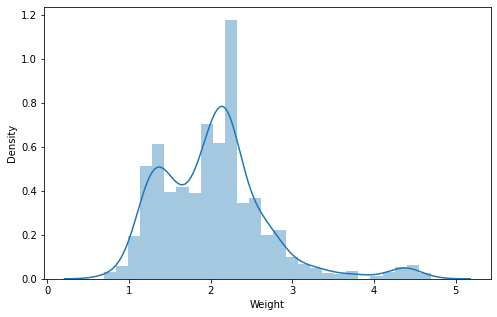

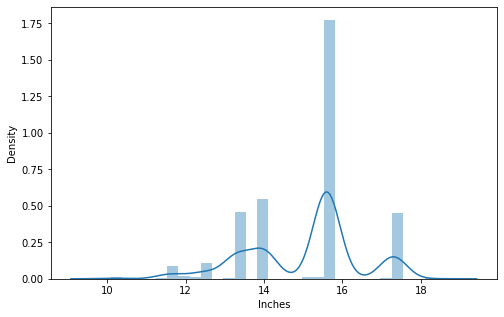

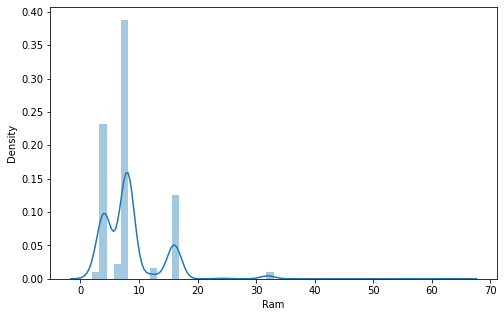

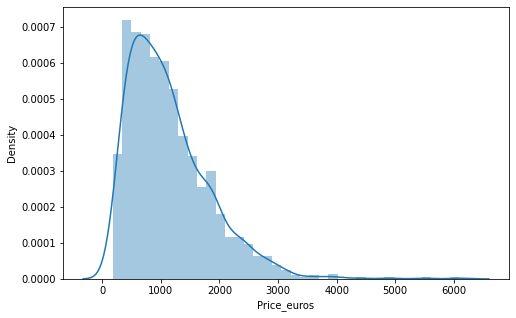

In [8]:
for i in list(num):
    plt.figure(figsize=(8,5))
    sns.distplot(df[i])
    plt.show

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   TypeName          1275 non-null   object 
 2   Inches            1275 non-null   float64
 3   ScreenResolution  1275 non-null   object 
 4   Cpu               1275 non-null   object 
 5   Ram               1275 non-null   object 
 6   Memory            1275 non-null   object 
 7   Gpu               1275 non-null   object 
 8   OpSys             1275 non-null   object 
 9   Weight            1275 non-null   float64
 10  Price_euros       1275 non-null   float64
dtypes: float64(3), object(8)
memory usage: 109.7+ KB


<AxesSubplot:>

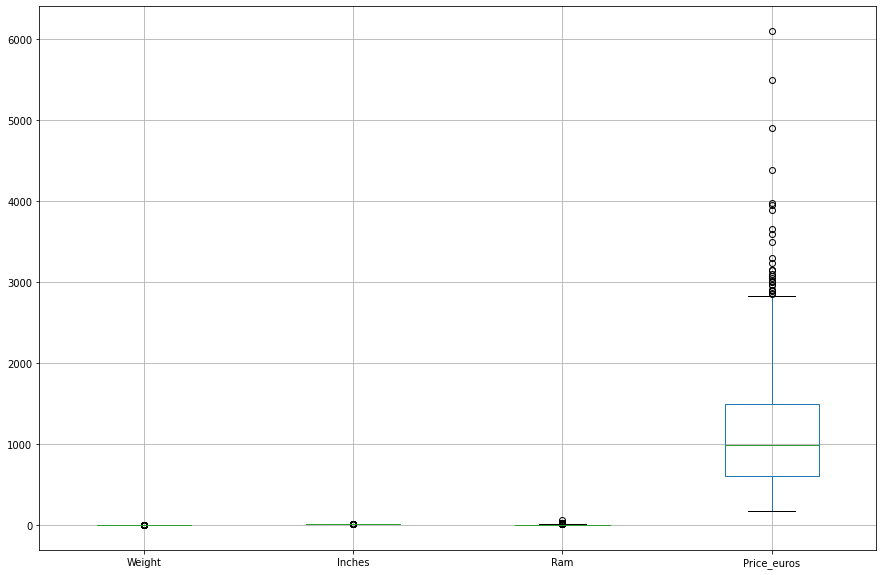

In [11]:
plt.figure(figsize=(15,10))
df.boxplot(num)

<AxesSubplot:xlabel='Weight', ylabel='Price_euros'>

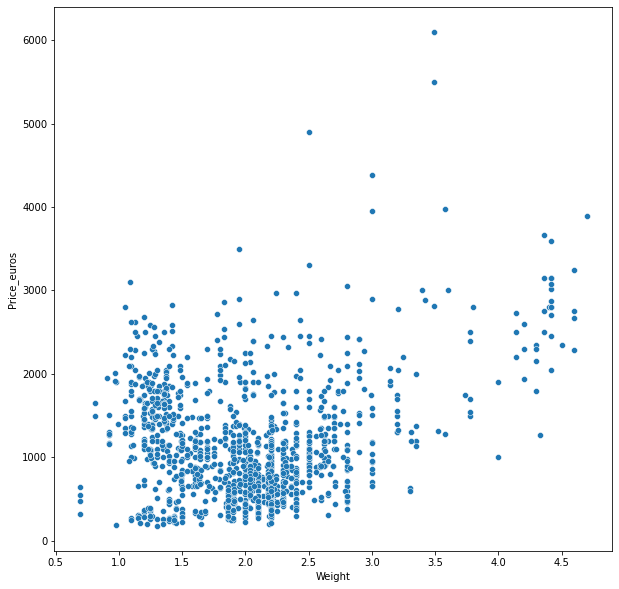

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='Weight',y='Price_euros')

In [39]:
# Position of the Outlier
print(np.where((df['Weight']>2.4) & (df['Price_euros']>3600)))

(array([ 196,  238,  610,  723,  749,  830, 1066, 1136], dtype=int64),)


In [40]:
df=df.drop([df.index[196],df.index[238],df.index[610],df.index[723],df.index[749],df.index[830],df.index[1066],
            df.index[1136]])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


<AxesSubplot:xlabel='Weight', ylabel='Price_euros'>

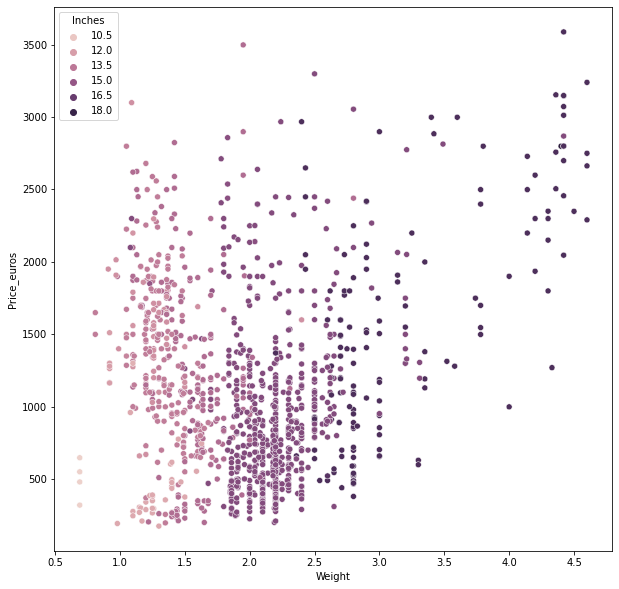

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='Weight',y='Price_euros',hue='Inches')

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

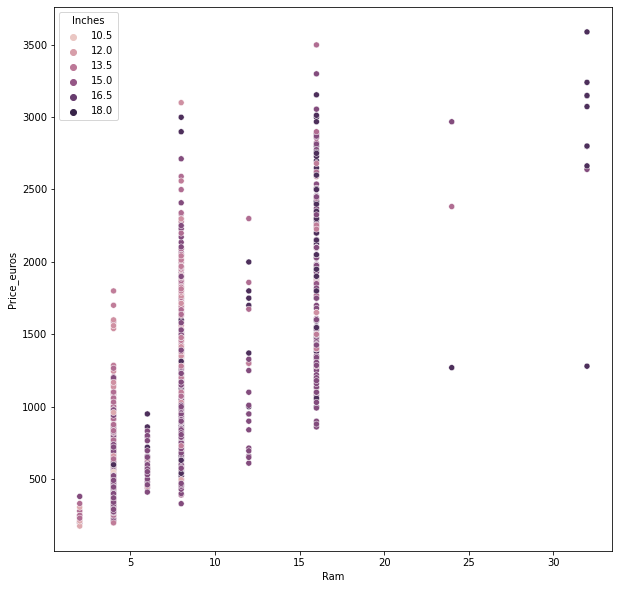

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='Ram',y='Price_euros',hue='Inches')

In [43]:
# Position of the Outlier
print(np.where((df['Price_euros']<500) & (df['Ram']==8)))

(array([  18,   74,  175,  254,  290,  311,  362,  363,  525,  569,  593,
        631,  674,  699,  778, 1051, 1155, 1224], dtype=int64),)


In [44]:
df=df.drop([df.index[18],df.index[74],df.index[175],df.index[254],df.index[290],df.index[311],
            df.index[362],df.index[363],df.index[525],df.index[569],df.index[593],df.index[631],
            df.index[674],df.index[699],df.index[778],df.index[1051], df.index[1155],df.index[1224]])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

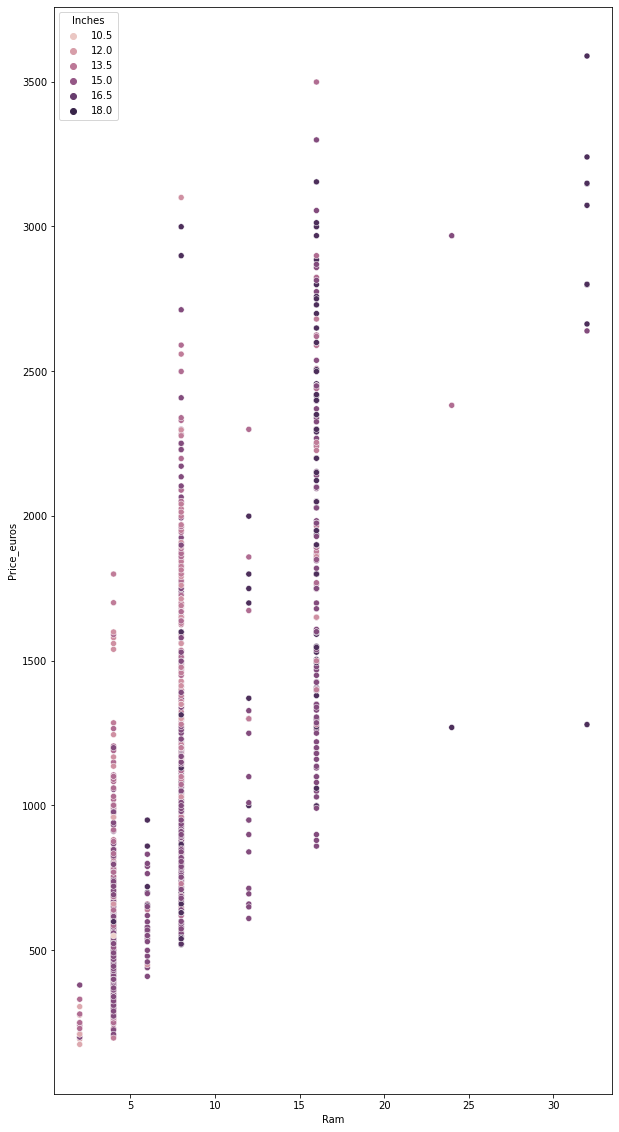

In [51]:
plt.figure(figsize=(10,20))
sns.scatterplot(data=df,x='Ram',y='Price_euros',hue='Inches')

In [50]:
# Position of the Outlier
print(np.where((df['Price_euros']<750) & (df['Ram']==12)))

(array([269, 279, 382, 576, 713], dtype=int64),)


In [52]:
df=df.drop([df.index[269],df.index[269],df.index[382],df.index[576],df.index[713]])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [53]:
# Position of the Outlier
print(np.where((df['Price_euros']<900) & (df['Ram']==16)))

(array([222, 231, 594], dtype=int64),)


In [54]:
df=df.drop([df.index[222],df.index[231],df.index[594]])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

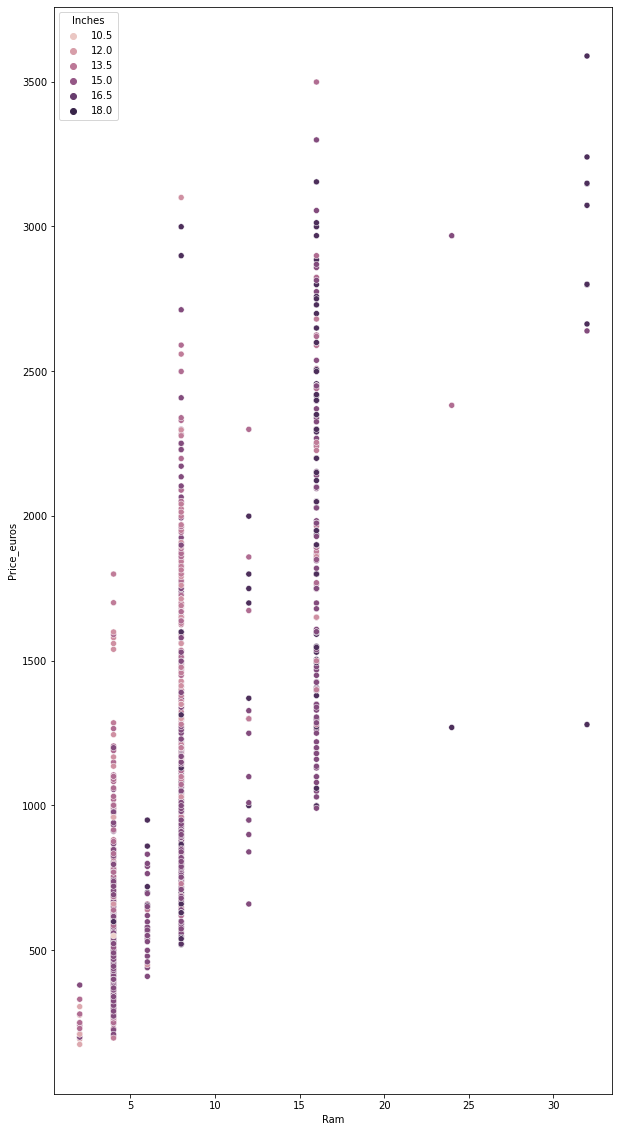

In [58]:
plt.figure(figsize=(10,20))
sns.scatterplot(data=df,x='Ram',y='Price_euros',hue='Inches')

In [63]:
# Position of the Outlier
print(np.where((df['Price_euros']>2700) & (df['Ram']==8)))
print(np.where((df['Price_euros']>3100) & (df['Ram']==16)))
print(np.where((df['Price_euros']<750) & (df['Ram']==12)))
print(np.where((df['Price_euros']>1500) & (df['Ram']==4)))
print(np.where((df['Price_euros']>1) & (df['Ram']==24)))
print(np.where((df['Price_euros']<2500) & (df['Ram']==32)))

(array([ 384,  548,  883, 1073], dtype=int64),)
(array([ 719,  927, 1199], dtype=int64),)
(array([276], dtype=int64),)
(array([ 852,  857,  903,  983,  984,  997, 1064], dtype=int64),)
(array([424, 480, 503], dtype=int64),)
(array([873], dtype=int64),)


In [64]:
df=df.drop([df.index[927],df.index[1199],df.index[276],df.index[852],df.index[857],df.index[903],
            df.index[983],df.index[984],df.index[997],df.index[1064],df.index[424],df.index[480],
            df.index[503],df.index[873],df.index[384],df.index[548],df.index[883],df.index[1073],
            df.index[719]])

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

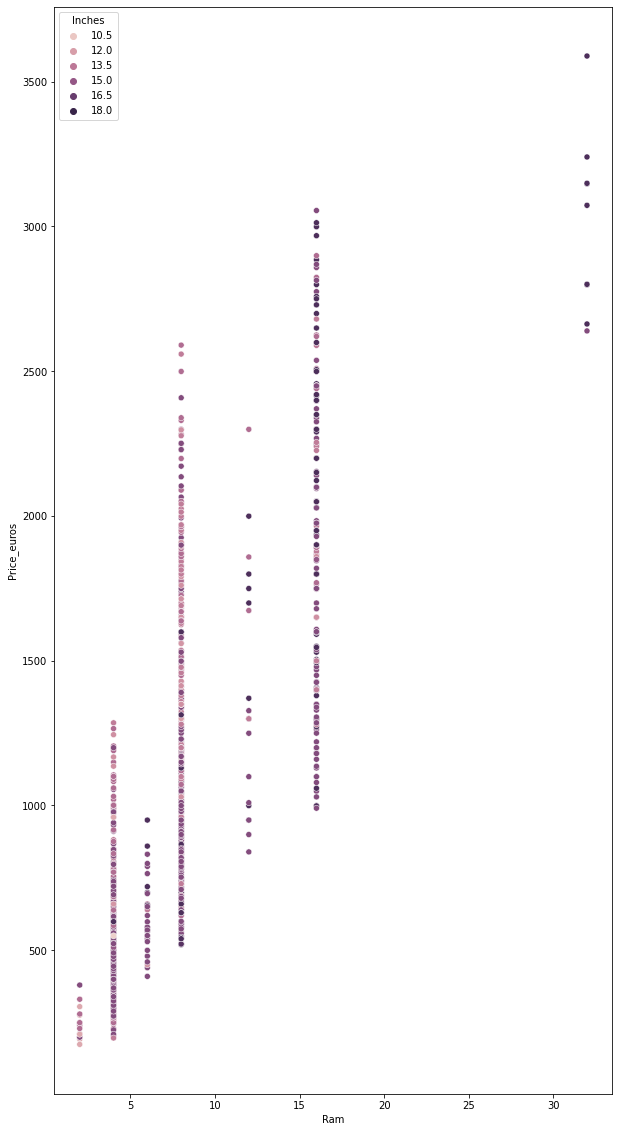

In [65]:
plt.figure(figsize=(10,20))
sns.scatterplot(data=df,x='Ram',y='Price_euros',hue='Inches')

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

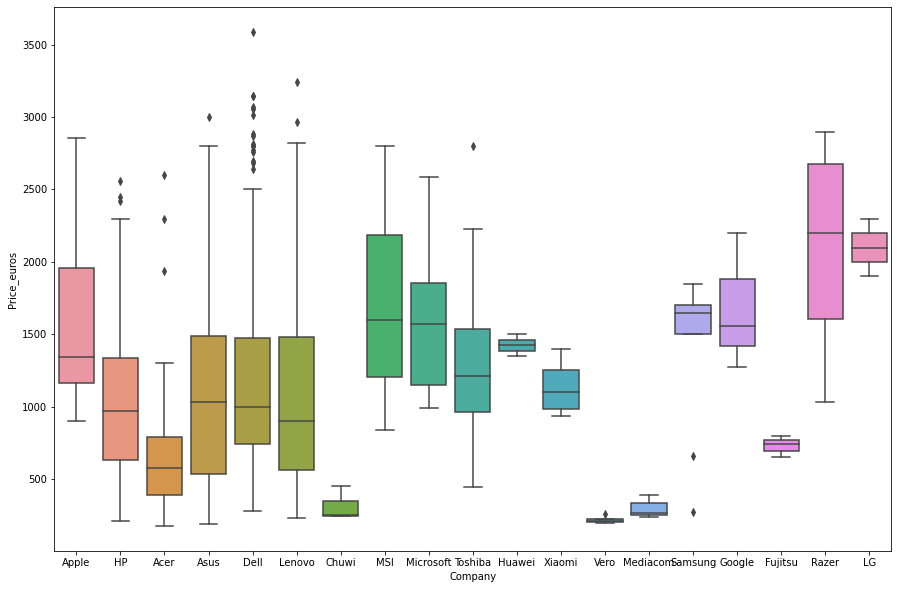

In [81]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='Company',y='Price_euros')

In [87]:
print(np.where((df['Price_euros']>2300) & (df['Company']=='HP')))
print(np.where((df['Price_euros']>1500) & (df['Company']=='Acer')))
print(np.where((df['Price_euros']>2900) & (df['Company']=='Asus')))
print(np.where((df['Price_euros']>2500) & (df['Company']=='Dell')))
print(np.where((df['Price_euros']>2500) & (df['Company']=='Toshiba')))
print(np.where((df['Price_euros']<1000) & (df['Company']=='Samsung')))
print(np.where((df['Price_euros']<200) & (df['Company']=='Vero')))

(array([304, 705, 822], dtype=int64),)
(array([ 700,  754, 1139], dtype=int64),)
(array([240], dtype=int64),)
(array([ 200,  286,  317,  408,  510,  532,  632,  657,  725,  747,  784,
        800,  806,  899,  927,  931, 1153], dtype=int64),)
(array([474], dtype=int64),)
(array([ 414, 1141], dtype=int64),)
(array([1072], dtype=int64),)


In [88]:
df=df.drop([df.index[304],df.index[705],df.index[822],df.index[700],df.index[754],df.index[1139],
            df.index[240],df.index[200],df.index[286],df.index[317],df.index[408],df.index[510],
            df.index[532],df.index[632],df.index[657],df.index[725],df.index[747],df.index[784],
            df.index[800],df.index[806],df.index[899],df.index[927],df.index[931],df.index[1153],
            df.index[474],df.index[414],df.index[1141],df.index[1072]])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

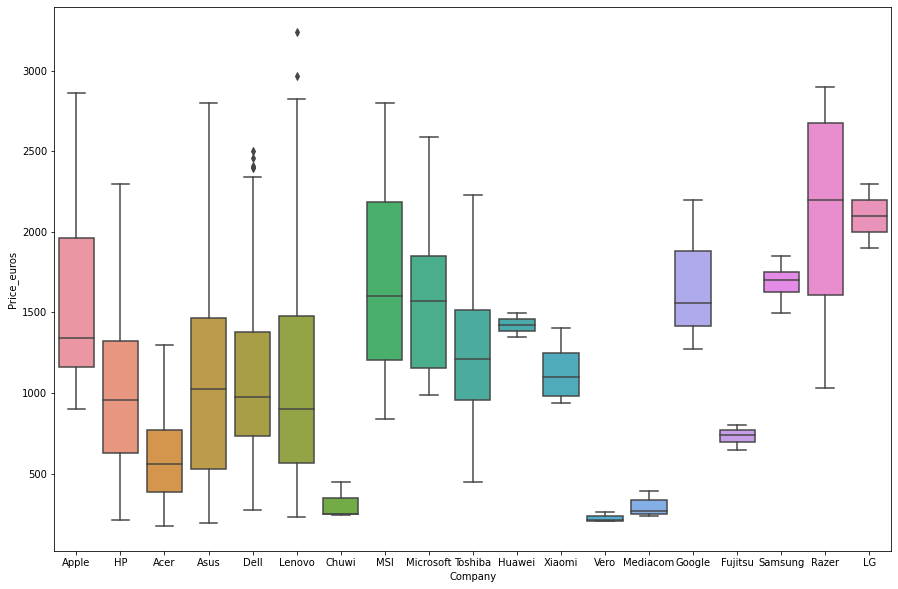

In [89]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='Company',y='Price_euros')

In [91]:
print(np.where((df['Price_euros']>2400) & (df['Company']=='Dell')))

(array([219, 297, 452], dtype=int64),)


In [92]:
df=df.drop([df.index[219],df.index[297],df.index[452]])

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

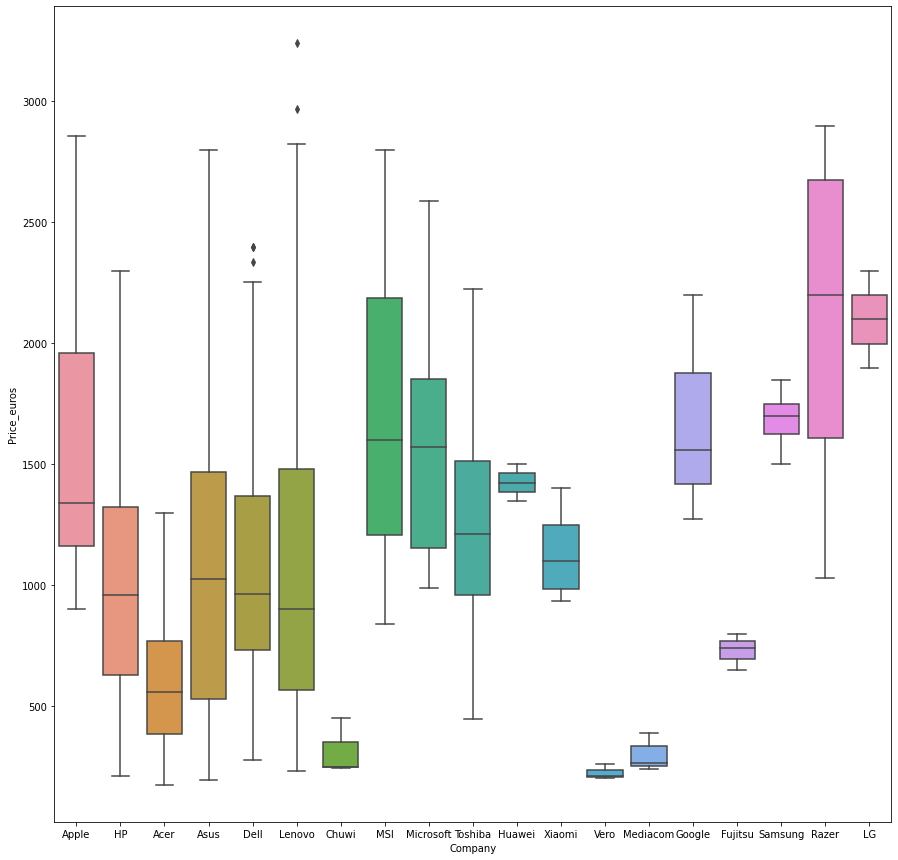

In [95]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Company',y='Price_euros')

In [96]:
print(np.where((df['Price_euros']>2350) & (df['Company']=='Dell')))
print(np.where((df['Price_euros']>2900) & (df['Company']=='Lenovo')))

(array([183, 599], dtype=int64),)
(array([ 947, 1008], dtype=int64),)


In [99]:
df=df.drop([df.index[183],df.index[599],df.index[947],df.index[1008]])

In [103]:
print(np.where((df['Price_euros']>2300) & (df['Company']=='Dell')))

(array([458], dtype=int64),)


In [104]:
df=df.drop([df.index[458]])

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

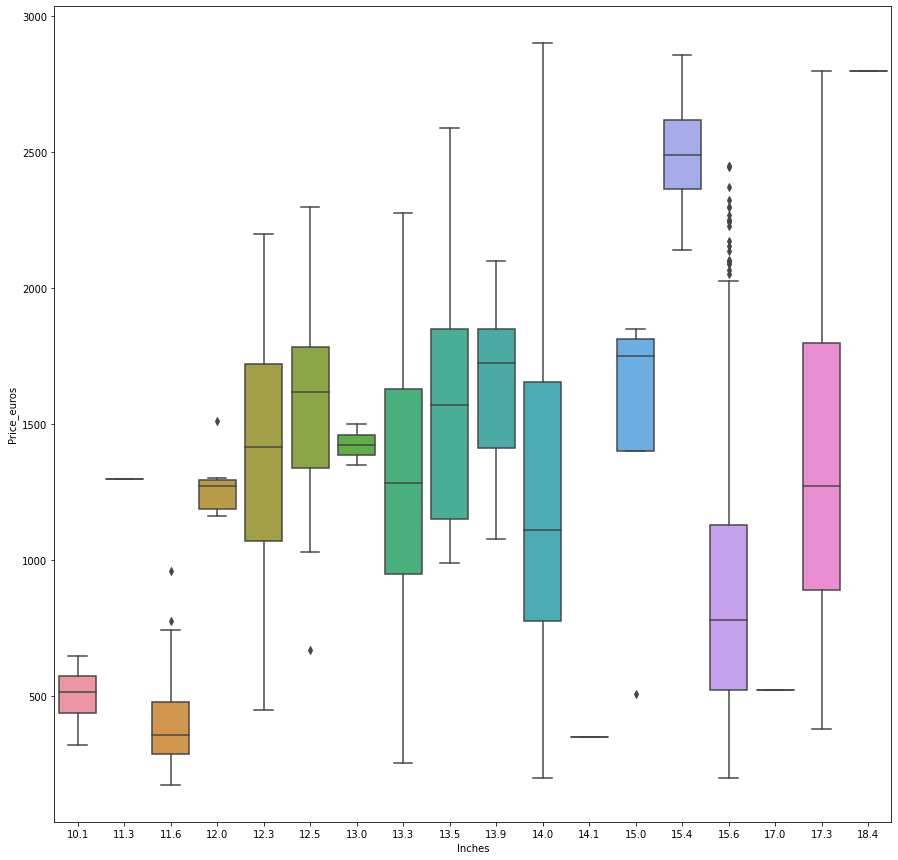

In [121]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Inches',y='Price_euros')

In [120]:
print(np.where((df['Price_euros']>750) & (df['Inches']==11.6)))
print(np.where((df['Price_euros']>1500) & (df['Inches']==12.0)))
print(np.where((df['Price_euros']<1000) & (df['Inches']==12.5)))
print(np.where((df['Price_euros']<1000) & (df['Inches']==15.0)))
print(np.where((df['Price_euros']>2100) & (df['Inches']==15.6)))

(array([ 888, 1146], dtype=int64),)
(array([79], dtype=int64),)
(array([651], dtype=int64),)
(array([1138], dtype=int64),)
(array([ 119,  366,  407,  408,  566,  577,  633,  722,  882,  970, 1057,
       1061, 1072, 1095, 1123, 1159], dtype=int64),)


In [122]:
df=df.drop([df.index[888],df.index[1146],df.index[79],df.index[651],df.index[1138],df.index[119],
            df.index[366],df.index[407],df.index[408],df.index[566],df.index[577],df.index[633],
            df.index[722],df.index[882],df.index[970],df.index[1057],df.index[1061],df.index[1072],
            df.index[1095],df.index[1123],df.index[1159]])

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

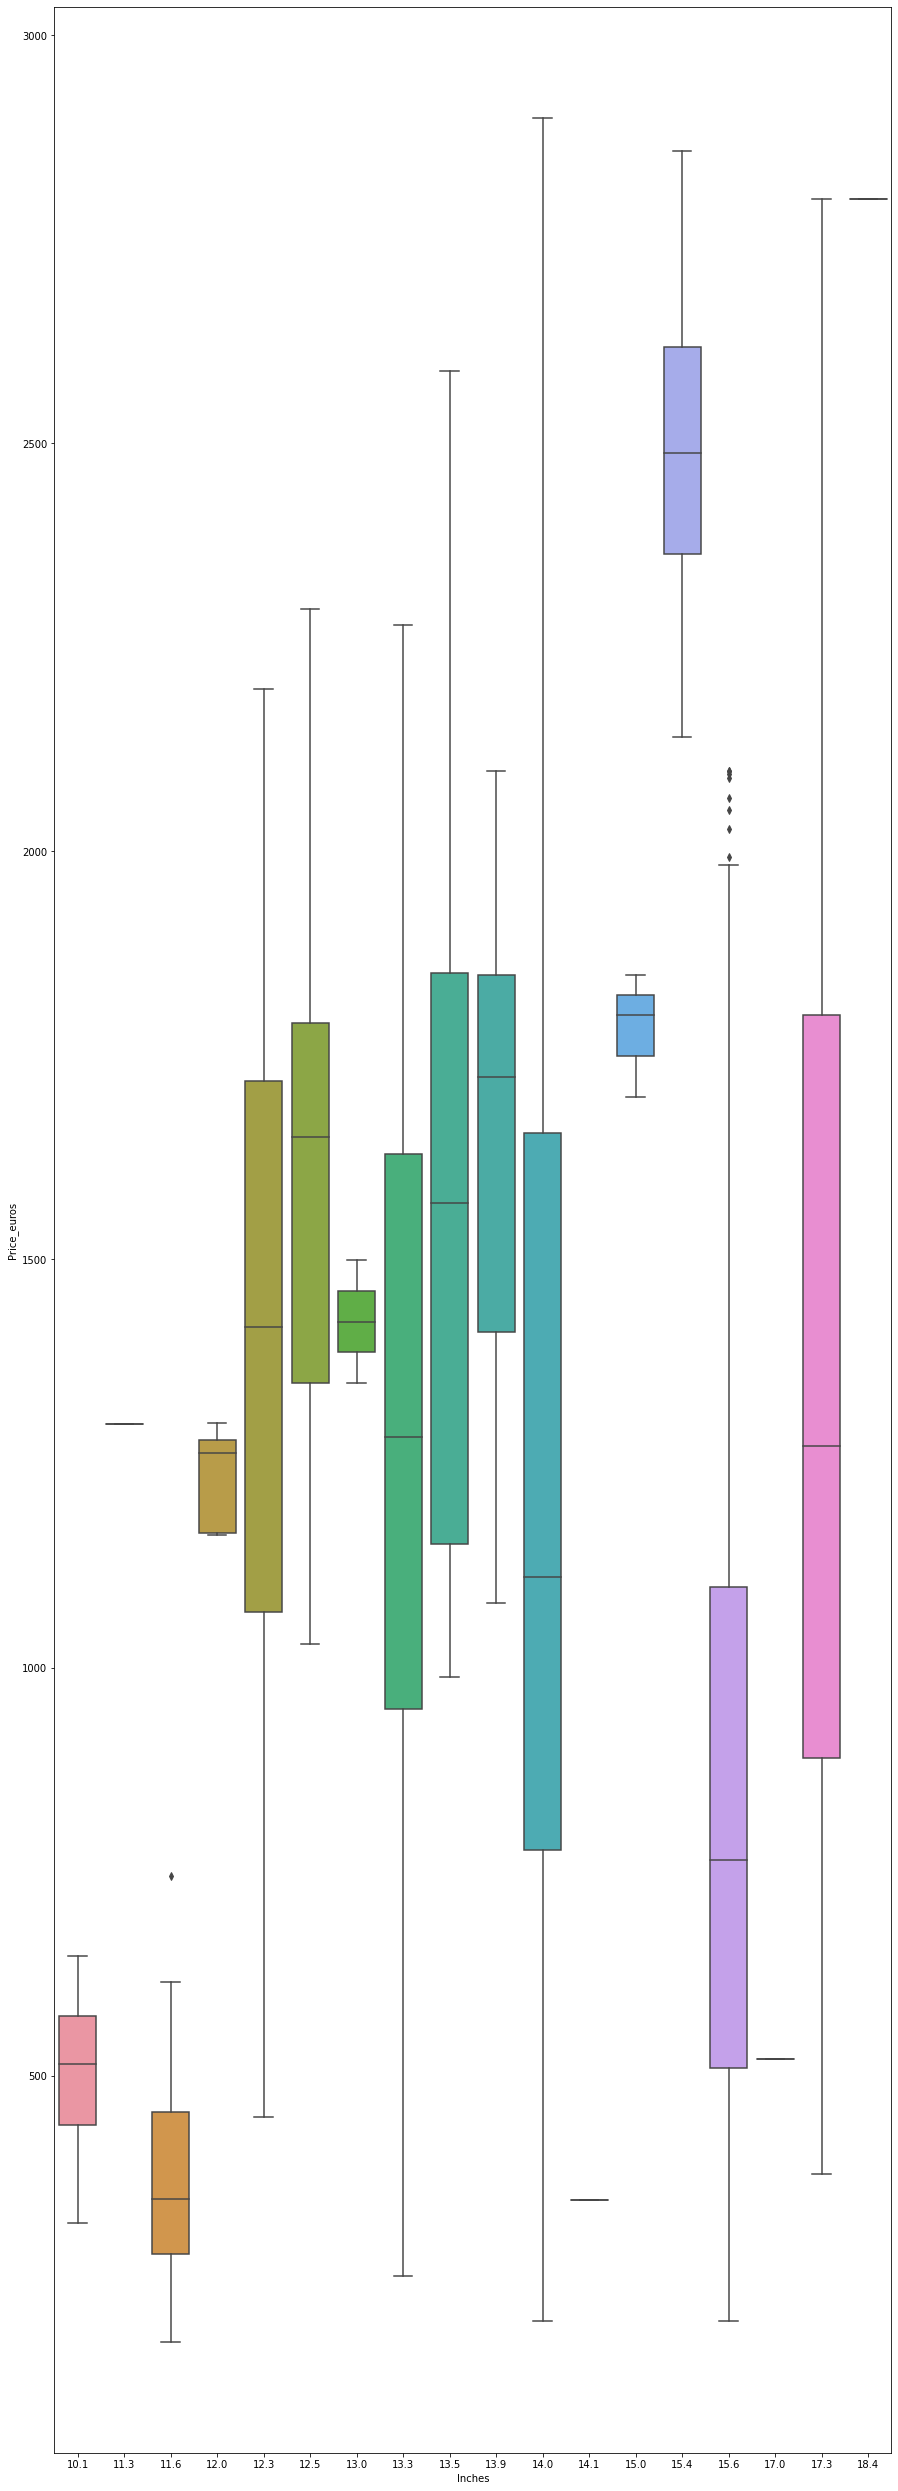

In [126]:
plt.figure(figsize=(15,45))
sns.boxplot(data=df,x='Inches',y='Price_euros')

In [127]:
print(np.where((df['Price_euros']>700) & (df['Inches']==11.6)))
print(np.where((df['Price_euros']>2000) & (df['Inches']==15.6)))

(array([737], dtype=int64),)
(array([293, 328, 432, 629, 678, 733, 830], dtype=int64),)


In [128]:
df=df.drop([df.index[737],df.index[293],df.index[328],df.index[432],df.index[629],df.index[678],df.index[733],df.index[830]])

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

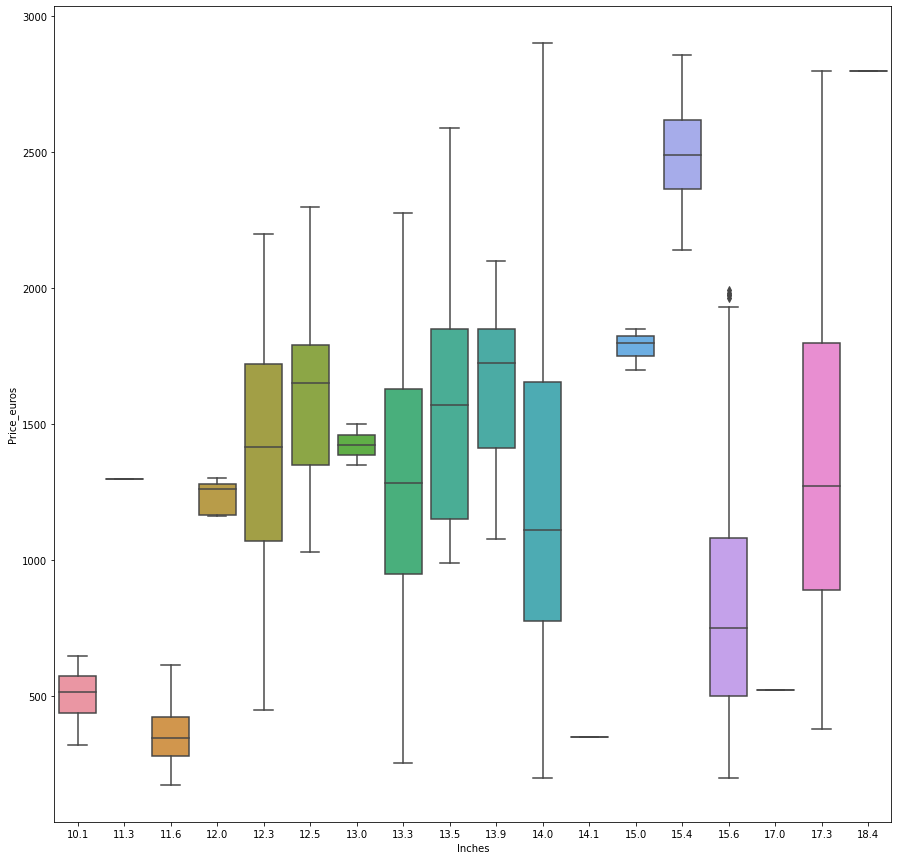

In [130]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Inches',y='Price_euros')

In [134]:
print(np.where((df['Price_euros']>1900) & (df['Inches']==15.6)))

(array([ 64, 381, 413, 417, 822, 839, 967], dtype=int64),)


In [135]:
df=df.drop([df.index[64],df.index[413],df.index[417],df.index[822],df.index[839],df.index[822]])

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

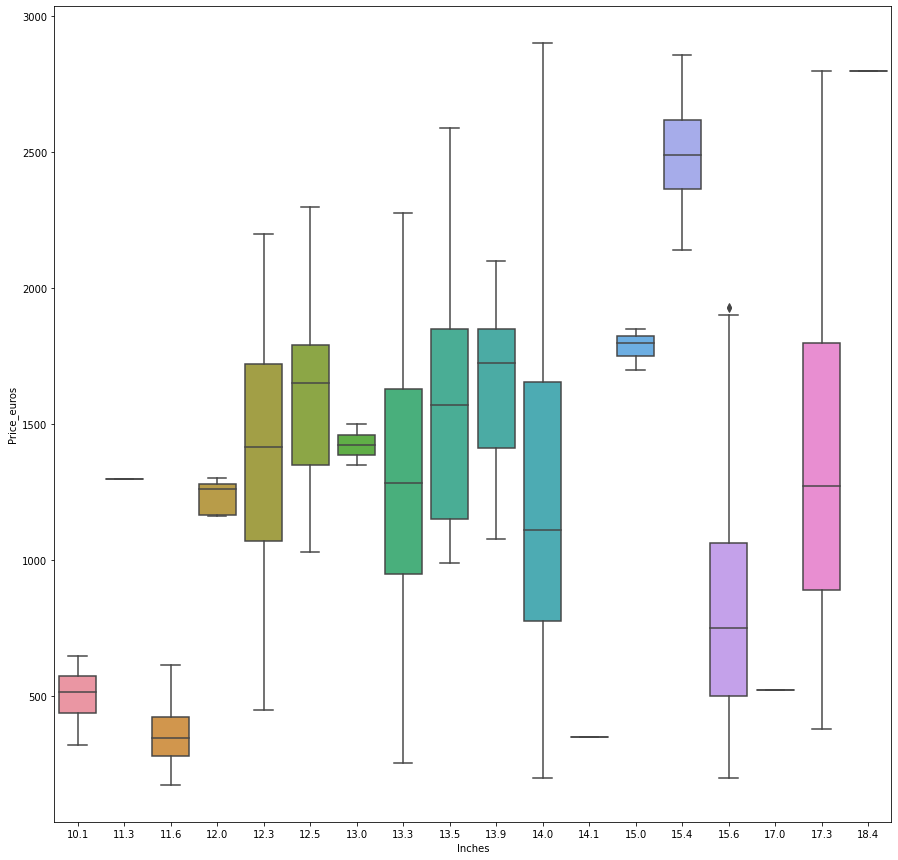

In [136]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Inches',y='Price_euros')

In [ ]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Inches',y='Price_euros')

<AxesSubplot:xlabel='Weight', ylabel='Price_euros'>

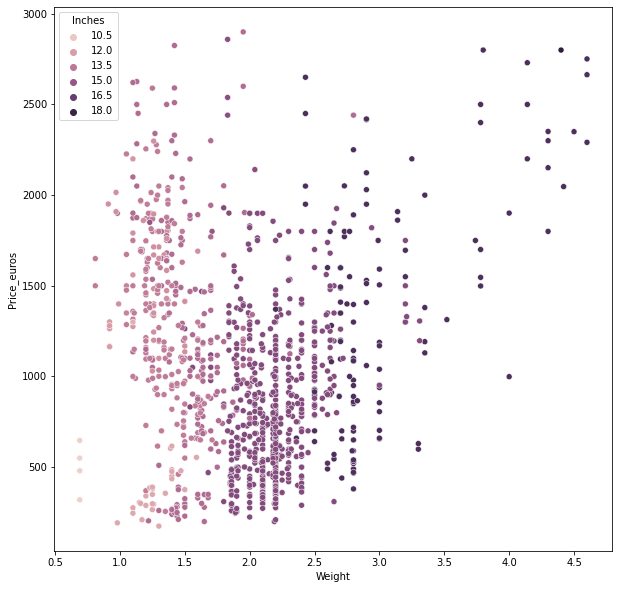

In [139]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='Weight',y='Price_euros',hue='Inches')

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

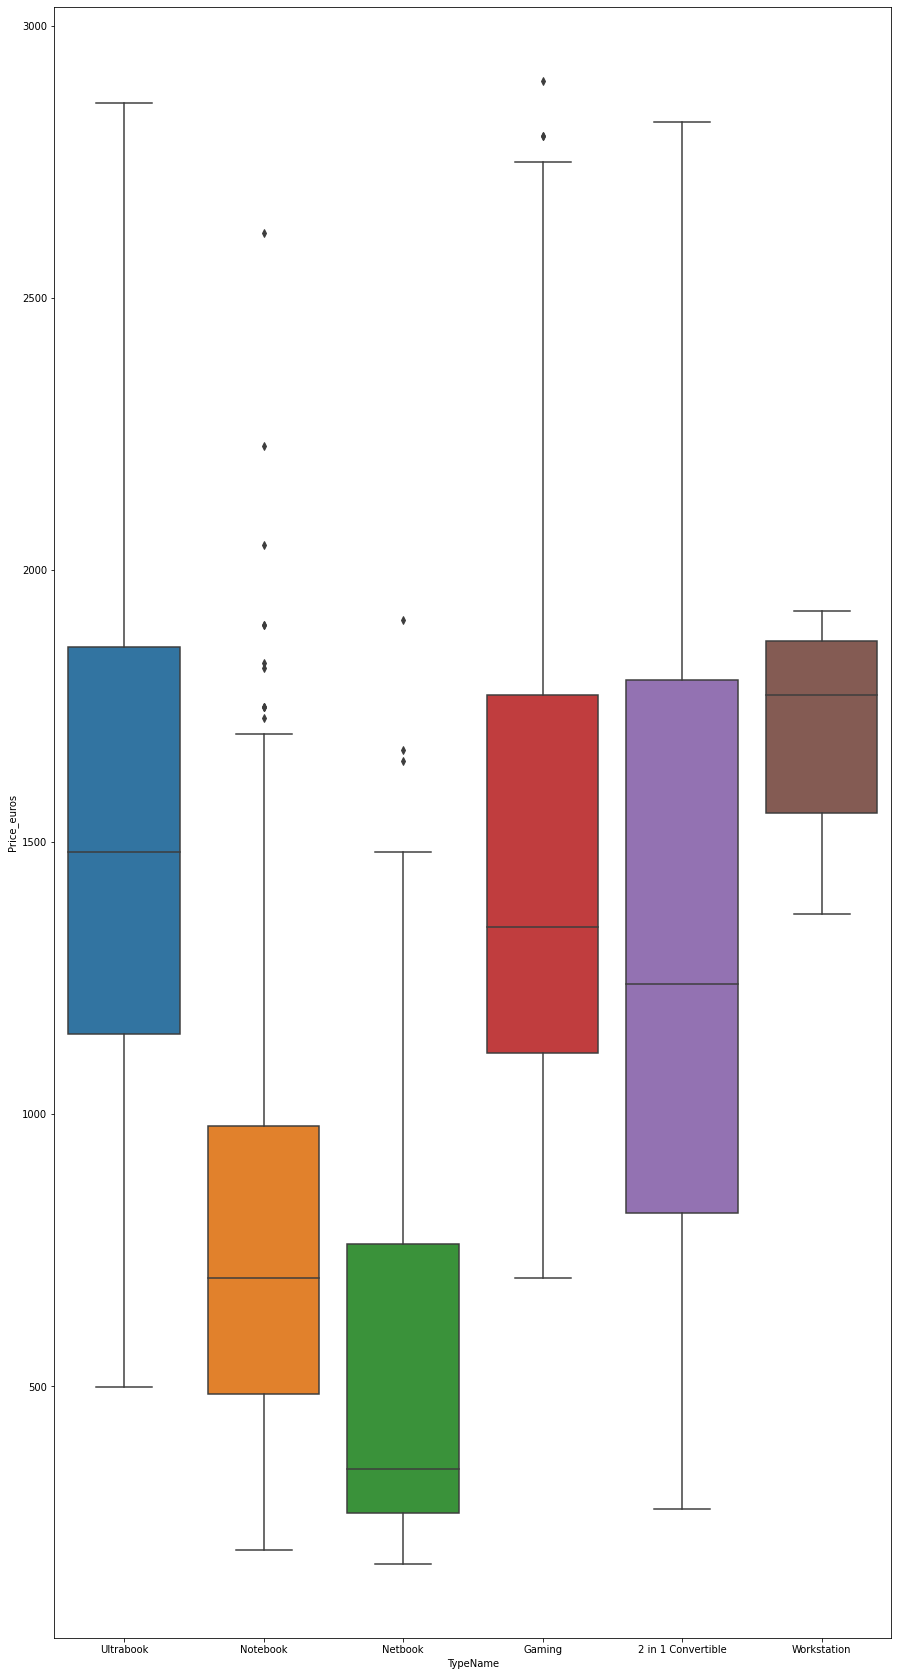

In [143]:
plt.figure(figsize=(15,30))
sns.boxplot(data=df,x='TypeName',y='Price_euros')

In [155]:
print(np.where((df['Price_euros']>1750) & (df['TypeName']=='Notebook')))
print(np.where((df['Price_euros']>1500) & (df['TypeName']=='Netbook')))
print(np.where((df['Price_euros']>2750) & (df['TypeName']=='Gaming')))

(array([275, 419, 447, 575, 681, 920, 949], dtype=int64),)
(array([ 845,  894, 1112], dtype=int64),)
(array([171, 594, 706], dtype=int64),)


In [156]:
df=df.drop([df.index[275],df.index[419],df.index[447],df.index[575],df.index[681],df.index[920],
            df.index[949],df.index[845],df.index[894],df.index[1112],df.index[171],df.index[594],
            df.index[706]])

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

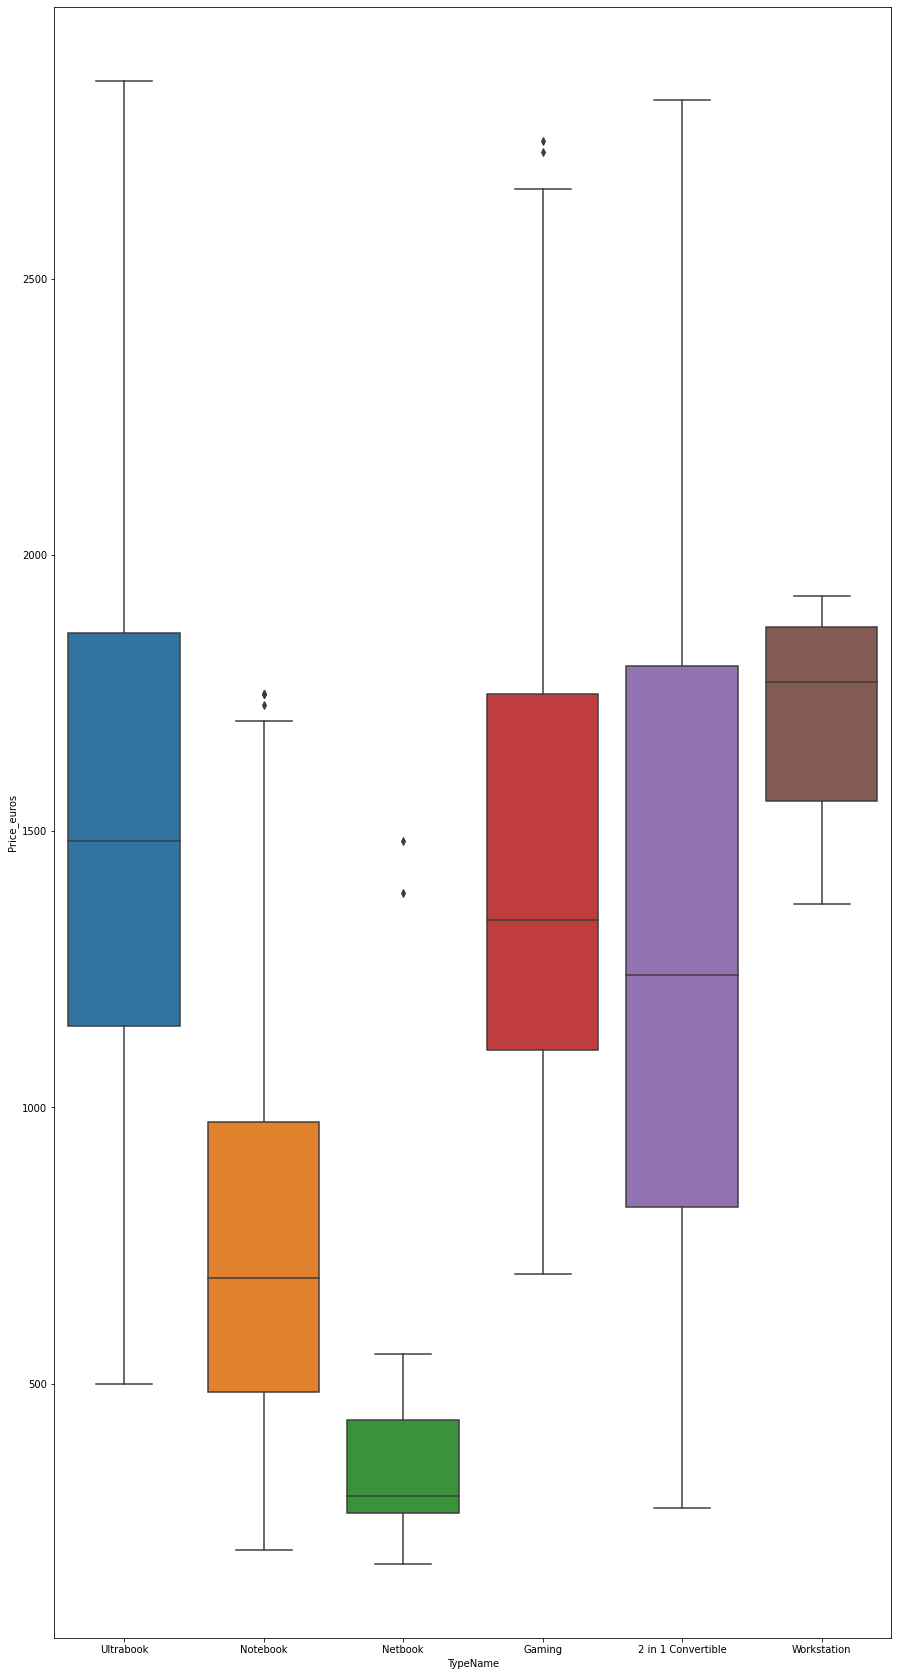

In [157]:
plt.figure(figsize=(15,30))
sns.boxplot(data=df,x='TypeName',y='Price_euros')

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

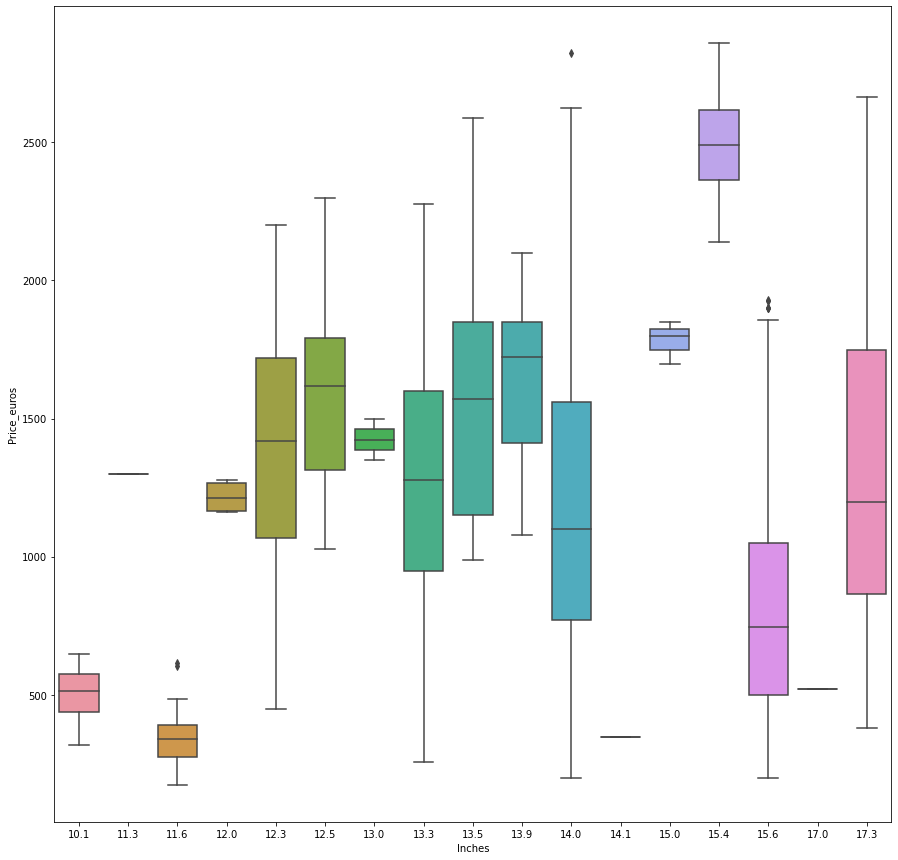

In [177]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Inches',y='Price_euros')

In [168]:
print(np.where((df['Price_euros']>1745) & (df['TypeName']=='Notebook')))
print(np.where((df['Price_euros']>1000) & (df['TypeName']=='Netbook')))
print(np.where((df['Price_euros']>2700) & (df['TypeName']=='Gaming')))

(array([ 451,  719, 1082], dtype=int64),)
(array([720, 811], dtype=int64),)
(array([526, 998], dtype=int64),)


In [169]:
df=df.drop([df.index[451],df.index[719],df.index[1082],df.index[720],df.index[811],df.index[526],
            df.index[998]])

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

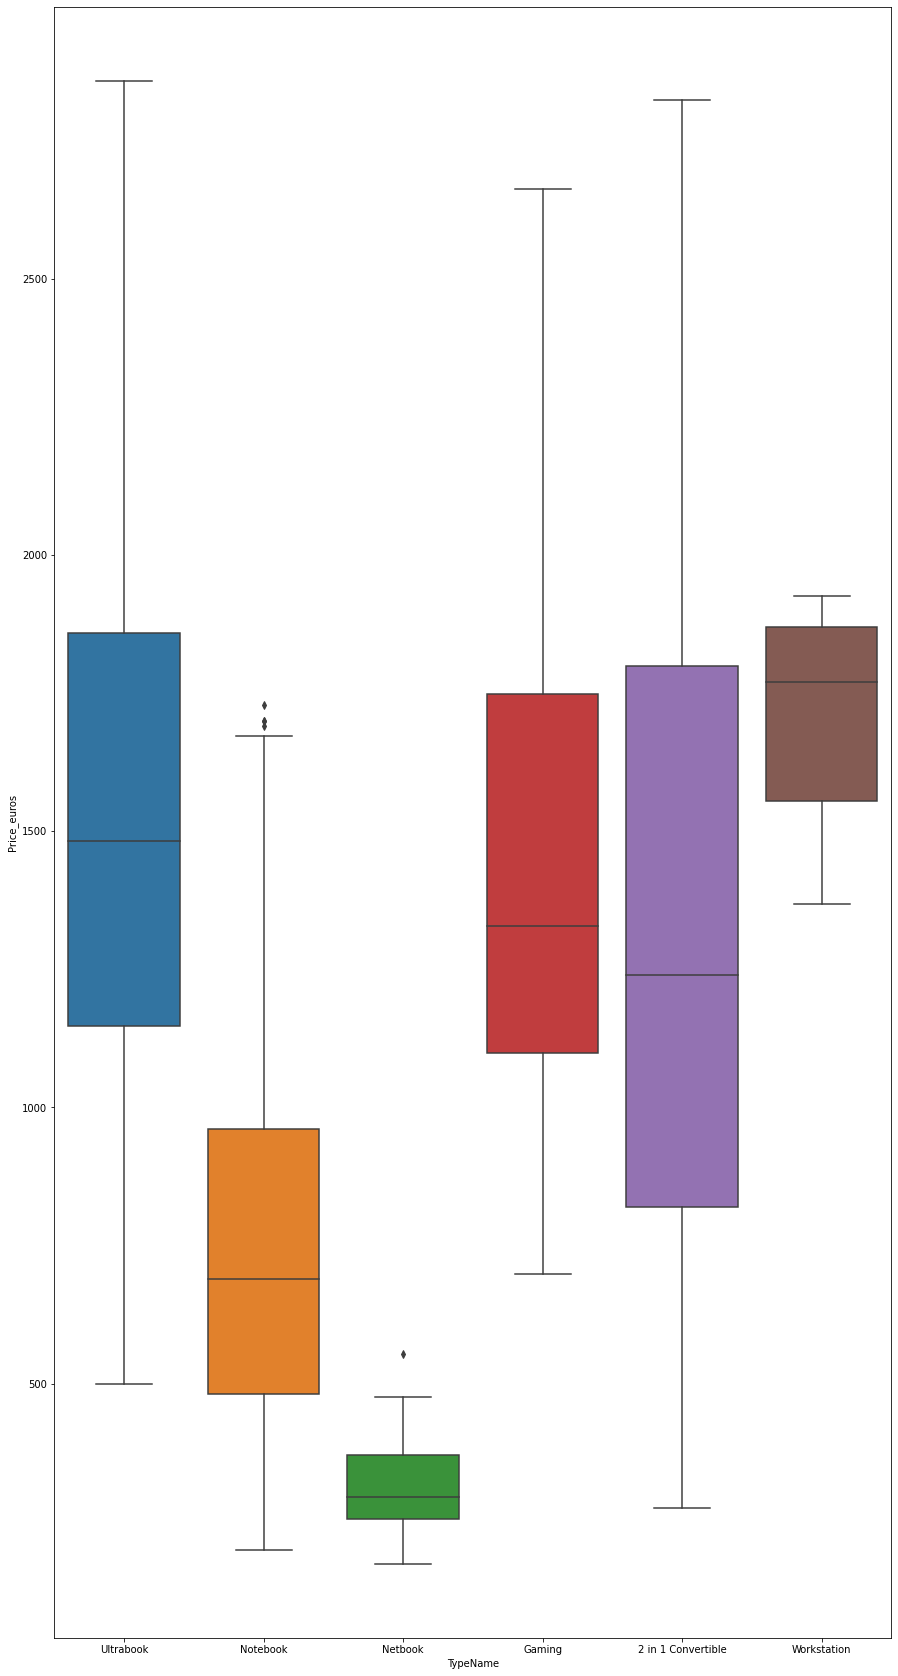

In [170]:
plt.figure(figsize=(15,30))
sns.boxplot(data=df,x='TypeName',y='Price_euros')

In [174]:
print(np.where((df['Price_euros']>1650) & (df['TypeName']=='Notebook')))
print(np.where((df['Price_euros']>500) & (df['TypeName']=='Netbook')))

(array([437, 499, 538, 987, 996], dtype=int64),)
(array([347], dtype=int64),)
(array([], dtype=int64),)


In [175]:
df=df.drop([df.index[437],df.index[499],df.index[538],df.index[987],df.index[996],df.index[347],
            df.index[949]])

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

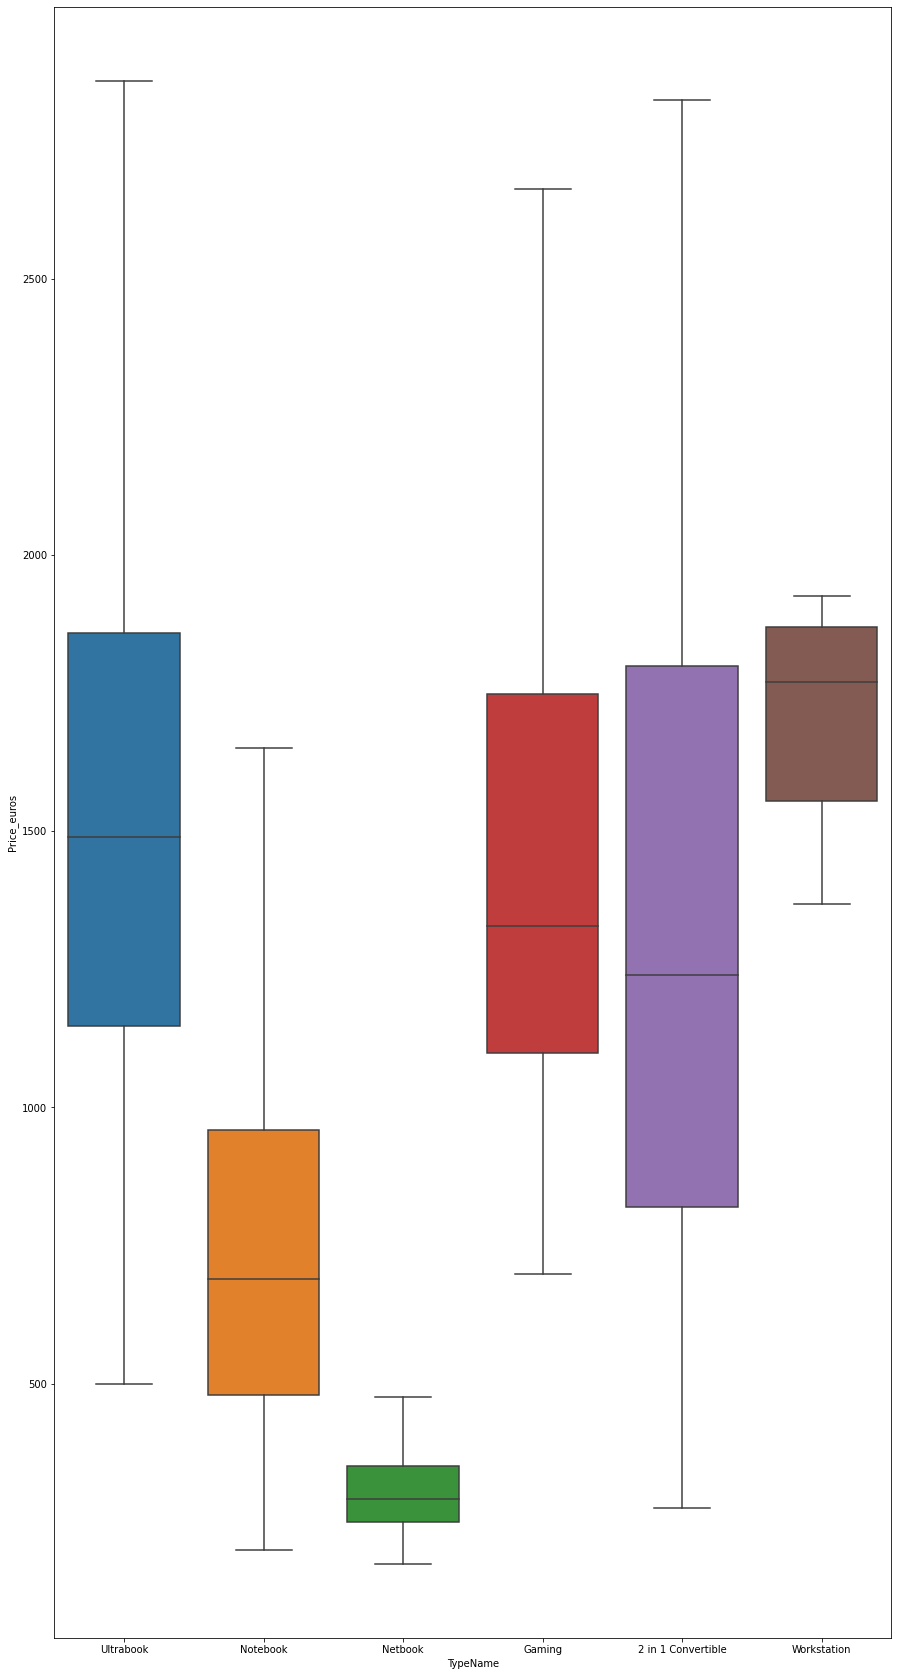

In [176]:
plt.figure(figsize=(15,30))
sns.boxplot(data=df,x='TypeName',y='Price_euros')

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

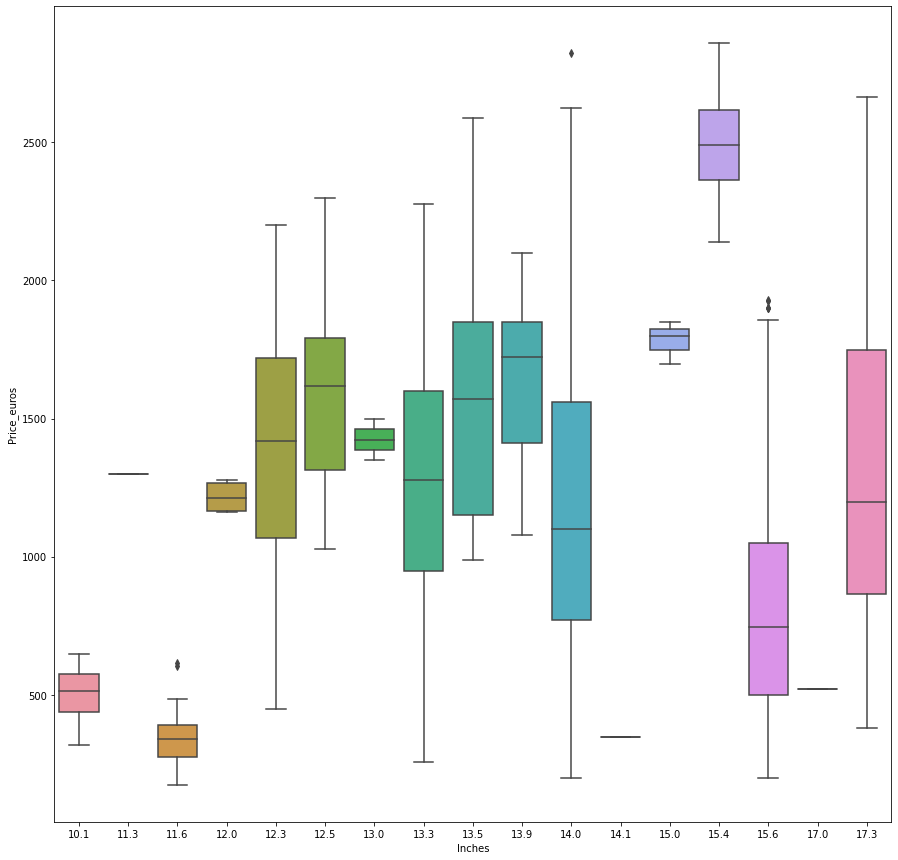

In [178]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Inches',y='Price_euros')

In [180]:
print(np.where((df['Price_euros']>500) & (df['Inches']==11.6)))
print(np.where((df['Price_euros']>2600) & (df['Inches']==14.0)))

(array([534, 749], dtype=int64),)
(array([182, 366], dtype=int64),)


In [181]:
df=df.drop([df.index[534],df.index[749],df.index[182],df.index[366]])

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

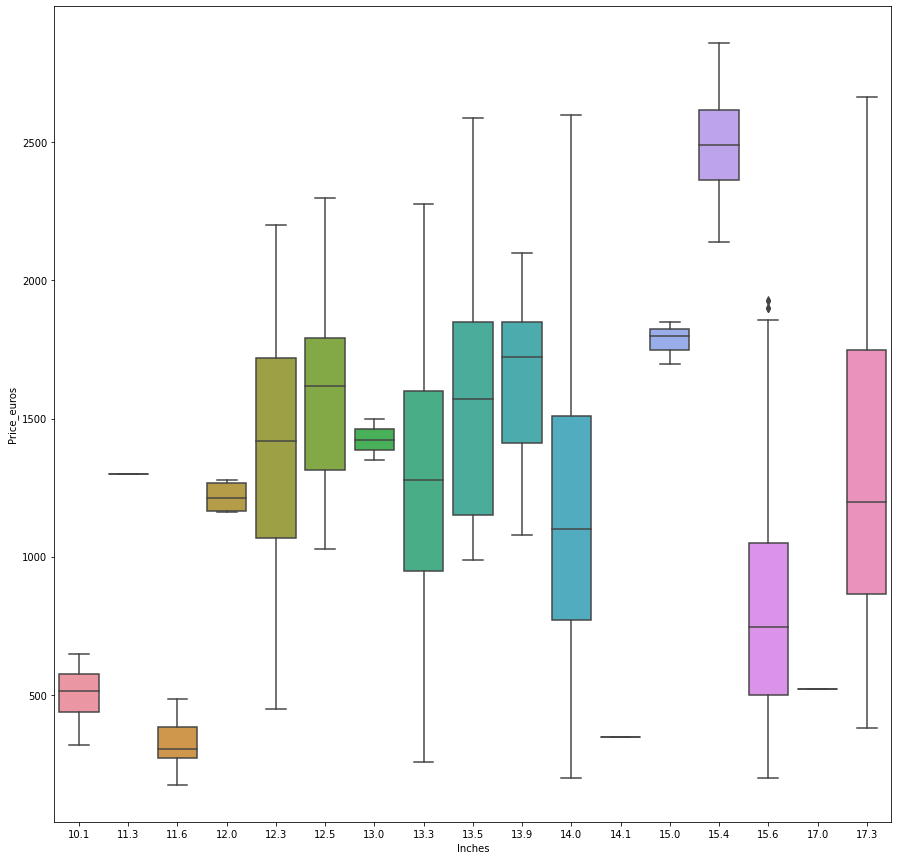

In [182]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Inches',y='Price_euros')

<AxesSubplot:xlabel='OpSys', ylabel='Price_euros'>

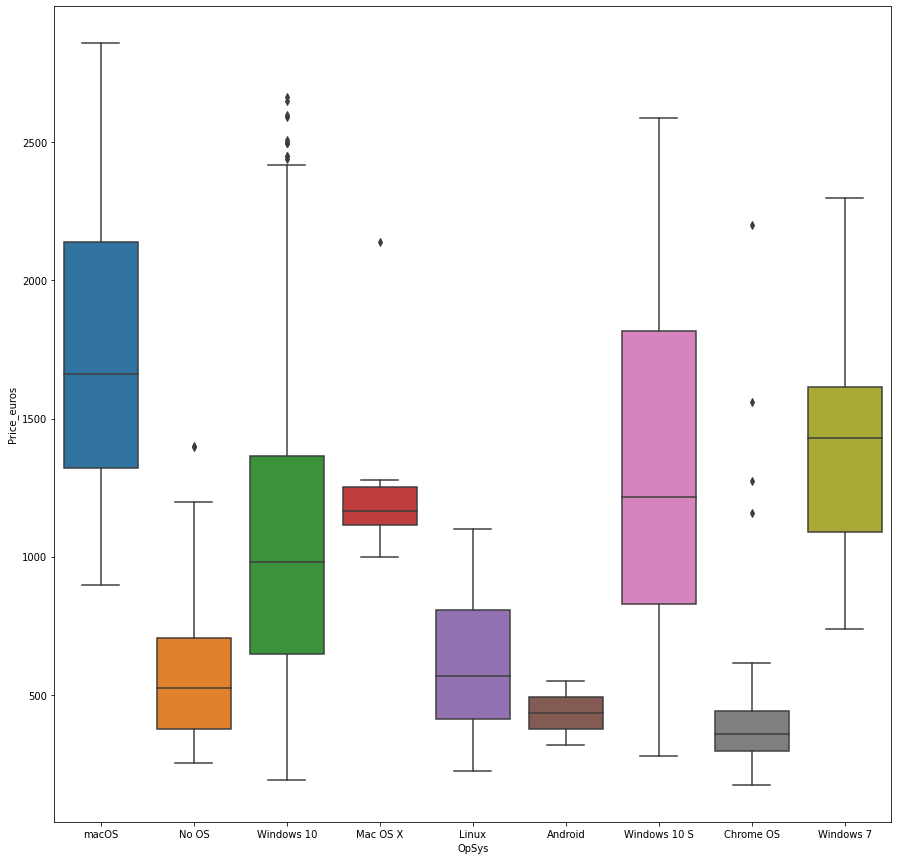

In [183]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='OpSys',y='Price_euros')

In [189]:
print(np.where((df['Price_euros']>1300) & (df['OpSys']=='No OS')))
print(np.where((df['Price_euros']>2400) & (df['OpSys']=='Windows 10')))
print(np.where((df['Price_euros']>1400) & (df['OpSys']=='Mac OS X')))
print(np.where((df['Price_euros']>1000) & (df['OpSys']=='Chrome OS')))

(array([194, 463], dtype=int64),)
(array([  57,  241,  256,  357,  519,  572,  577,  617,  715,  725,  737,
        790,  948, 1002], dtype=int64),)
(array([6], dtype=int64),)
(array([398, 428, 675, 839], dtype=int64),)


In [190]:
df=df.drop([df.index[194],df.index[463],df.index[57],df.index[241],df.index[256],df.index[357],
            df.index[519],df.index[572],df.index[577],df.index[617],df.index[715],df.index[725],
            df.index[737],df.index[790],df.index[948],df.index[1002],df.index[6],df.index[398],
            df.index[428],df.index[675],df.index[839]])

<AxesSubplot:xlabel='OpSys', ylabel='Price_euros'>

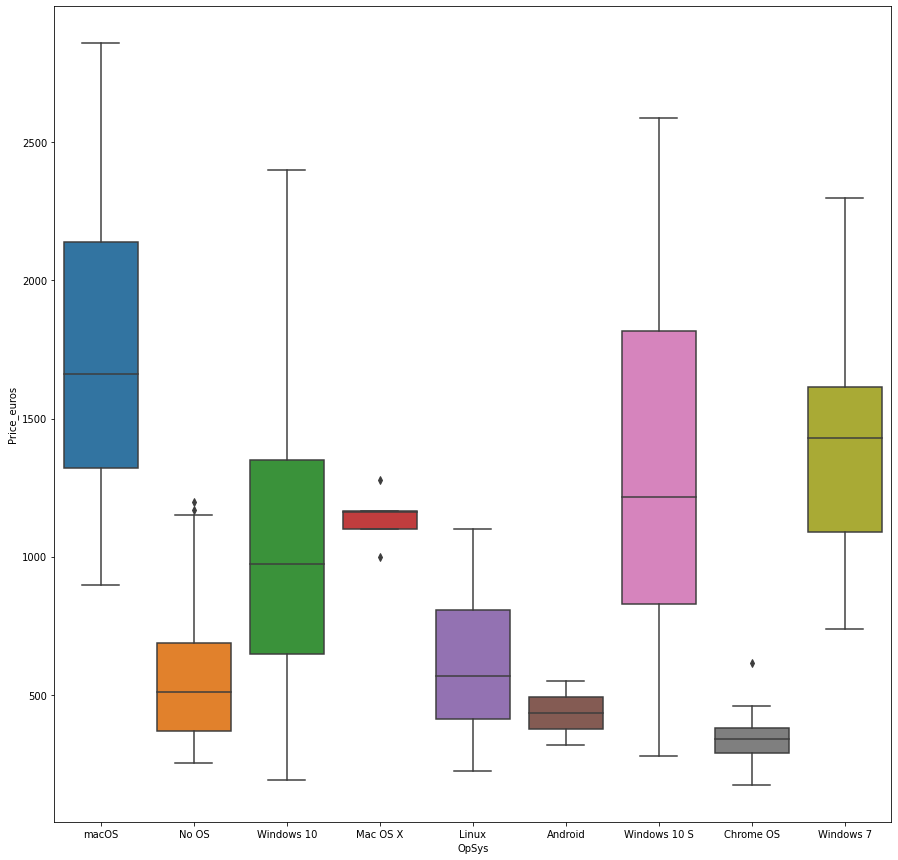

In [191]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='OpSys',y='Price_euros')

In [203]:
print(np.where((df['Price_euros']>1100) & (df['OpSys']=='No OS')))
print(np.where((df['Price_euros']>2400) & (df['OpSys']=='Windows 10')))
print(np.where((df['Price_euros']>1200) & (df['OpSys']=='Mac OS X')))
print(np.where((df['Price_euros']<1000) & (df['OpSys']=='Mac OS X')))
print(np.where((df['Price_euros']>500) & (df['OpSys']=='Chrome OS')))

(array([175, 450, 562], dtype=int64),)
(array([], dtype=int64),)
(array([1043], dtype=int64),)
(array([32], dtype=int64),)
(array([938], dtype=int64),)


In [204]:
df=df.drop([df.index[175],df.index[450],df.index[562],df.index[1043],df.index[32],df.index[938]])

<AxesSubplot:xlabel='OpSys', ylabel='Price_euros'>

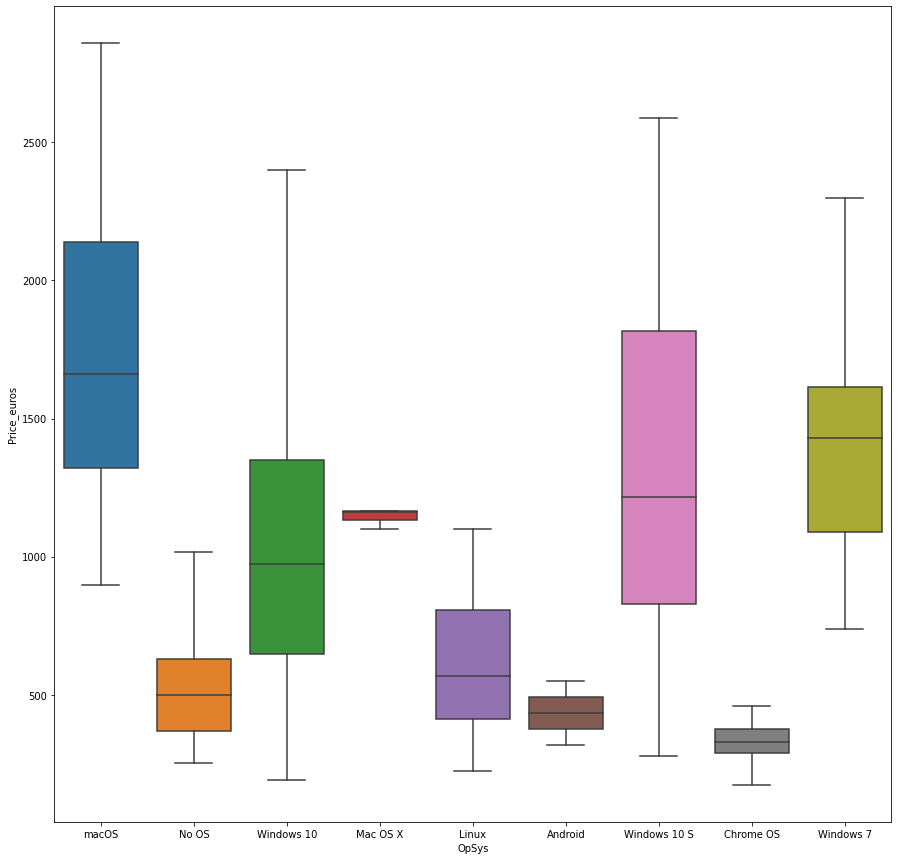

In [205]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='OpSys',y='Price_euros')

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

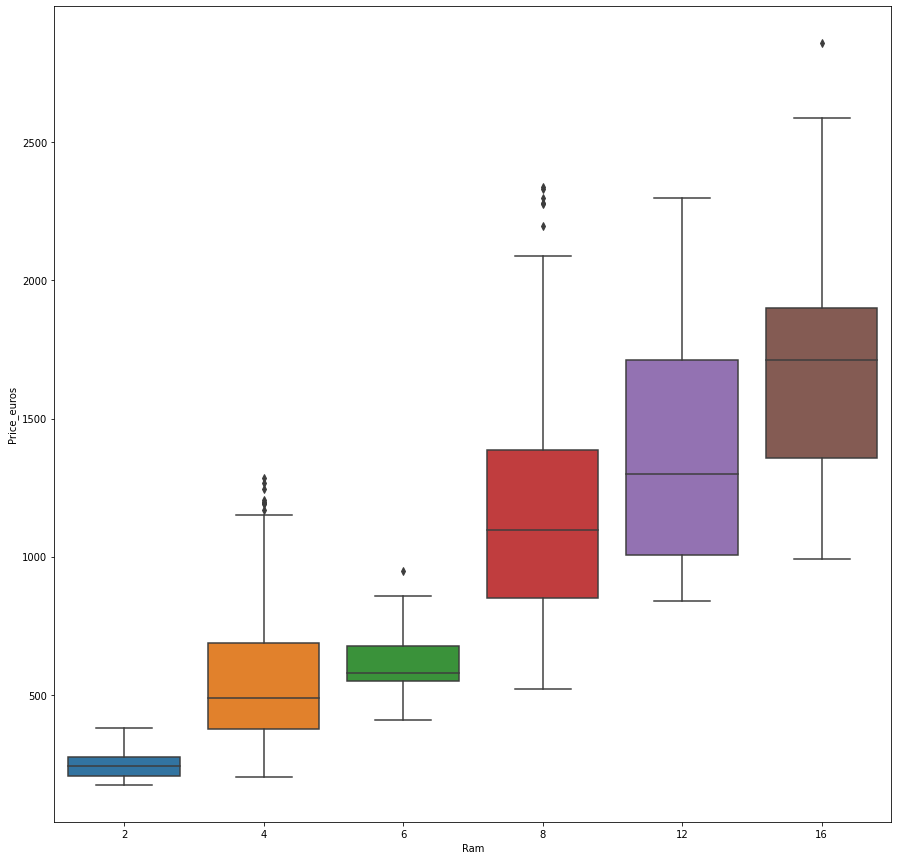

In [206]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Ram',y='Price_euros')

In [214]:
print(np.where((df['Price_euros']>1150) & (df['Ram']==4)))
print(np.where((df['Price_euros']>900) & (df['Ram']==6)))
print(np.where((df['Price_euros']>2100) & (df['Ram']==8)))
print(np.where((df['Price_euros']>2600) & (df['Ram']==16)))

(array([669, 739, 765, 840, 862, 864, 879, 919, 945], dtype=int64),)
(array([489], dtype=int64),)
(array([ 347,  685,  726,  981,  984, 1057], dtype=int64),)
(array([16], dtype=int64),)


In [215]:
df=df.drop([df.index[669],df.index[739],df.index[765],df.index[840],df.index[862],df.index[864],
            df.index[879],df.index[919],df.index[945],df.index[489],df.index[347],df.index[685],
            df.index[726],df.index[981], df.index[984], df.index[1057], df.index[16]])

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

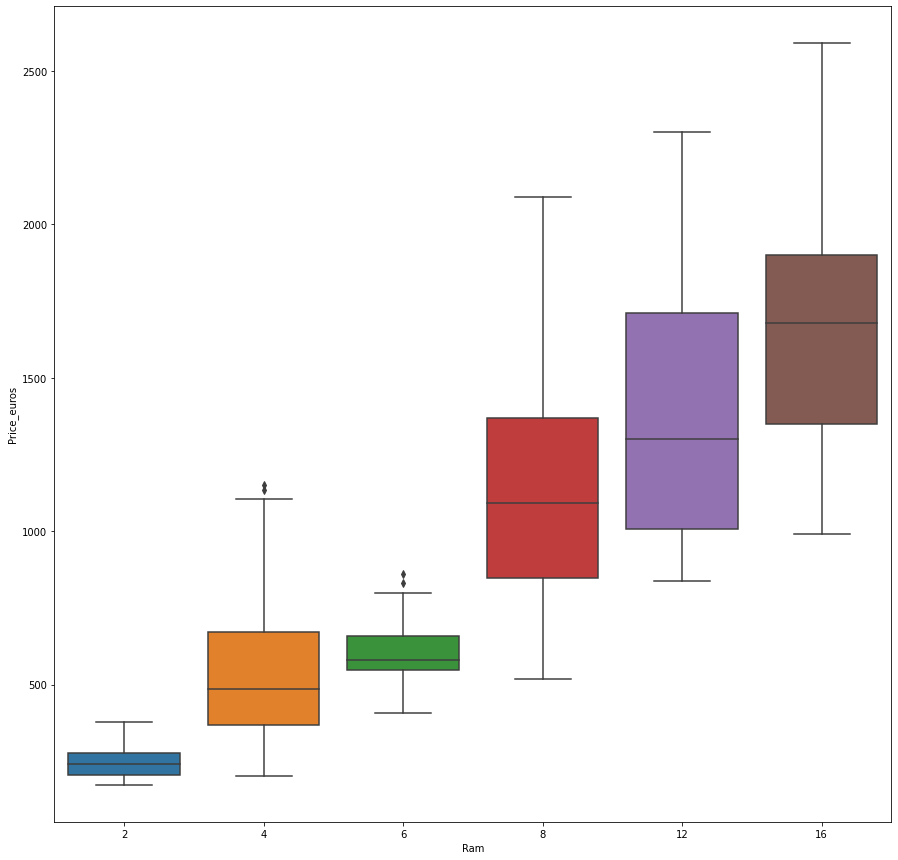

In [216]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Ram',y='Price_euros')

In [218]:
df.to_csv('laptop_clean_scatter_final.csv')